<a href="https://colab.research.google.com/github/hugomaharavo/ai4eng-20242-Pruebas-Saber-Pro-Colombia/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar datos desde Kaggle

En primer lugar, vamos a cargar los datos de la competición Kaggle utilizando la biblioteca opendatasets

In [1]:
# Instale la biblioteca opendatasets para descargar conjuntos de datos directamente de Kaggle
!pip install opendatasets

# Importar los módulos necesarios
import opendatasets as kaggle_data
import os

# Enlace al concurso de Kaggle
competition_url = "https://www.kaggle.com/competitions/udea-ai4eng-20242"

# Descargar los datos del concurso
kaggle_data.download(competition_url)

# Cambiar de directorio para acceder a la carpeta del conjunto de datos descargado
project_dir = "udea-ai4eng-20242"
os.chdir(project_dir)

# Comprobación de los archivos descargados
files = os.listdir()
print("Archivos disponibles en la carpeta : ", files)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hugomaharavo
Your Kaggle Key: ··········


100%|██████████| 20.1M/20.1M [00:00<00:00, 102MB/s] 



Extracting archive ./udea-ai4eng-20242/udea-ai4eng-20242.zip to ./udea-ai4eng-20242
Archivos disponibles en la carpeta :  ['train.csv', 'test.csv', 'submission_example.csv']




---

# Previsualización de los datos:

Empezamos cargando los datos y visualizando las primeras líneas para entender la estructura

In [5]:
# Importar pandas, plot y seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos
train_df = pd.read_csv("train.csv")

# Resumen de datos
print("Vista previa de las primeras líneas del conjunto de datos :")
display(train_df.head())

Vista previa de las primeras líneas del conjunto de datos :


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


---
#Dimensiones y valores perdidos:
Obtenemos el número de filas/columnas y comprobamos si faltan valores en cada columna.


In [6]:
# Dimensiones del conjunto de datos
print(f"\nEl conjunto de datos contiene {train_df.shape[0]} filas y {train_df.shape[1]} columnas.")

# Comprobación de valores omitidos
print("\nValores ausentes en cada columna :")
print(train_df.isnull().sum())



El conjunto de datos contiene 692500 filas y 12 columnas.

Valores ausentes en cada columna :
ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
RENDIMIENTO_GLOBAL                    0
dtype: int64


---
#Distribución de clases de rendimiento
Cuenta y muestra la distribución de alumnos por clases de rendimiento.


Distribución de las clases de rendimiento :
RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


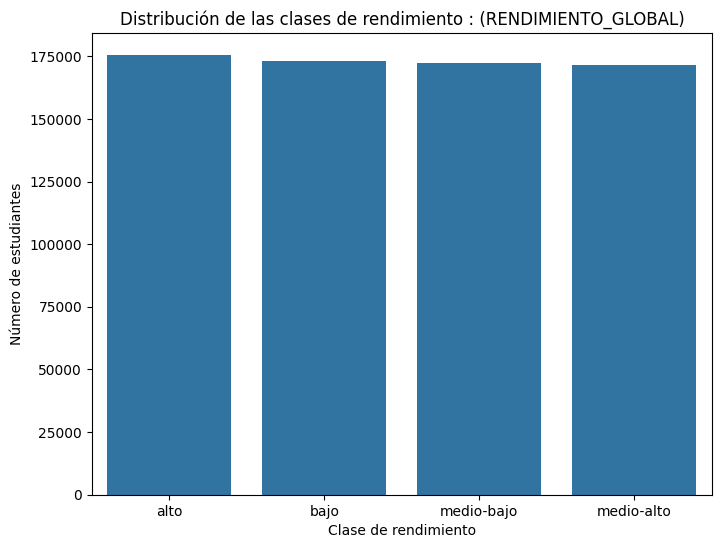

In [7]:
# Distribución de alumnos por clase de rendimiento (RENDIMIENTO_GLOBAL)
print("\nDistribución de las clases de rendimiento :")
performance_counts = train_df['RENDIMIENTO_GLOBAL'].value_counts()
print(performance_counts)

# Visualización de la distribución de las clases de rendimiento
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='RENDIMIENTO_GLOBAL', order=performance_counts.index)
plt.title("Distribución de las clases de rendimiento : (RENDIMIENTO_GLOBAL)")
plt.xlabel("Clase de rendimiento")
plt.ylabel("Número de estudiantes")
plt.show()




---

# Distribución por departamentos
Se muestran los 10 departamentos con más alumnos.




Distribución de los estudiantes por departamentos :
ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
Name: count, dtype: int64


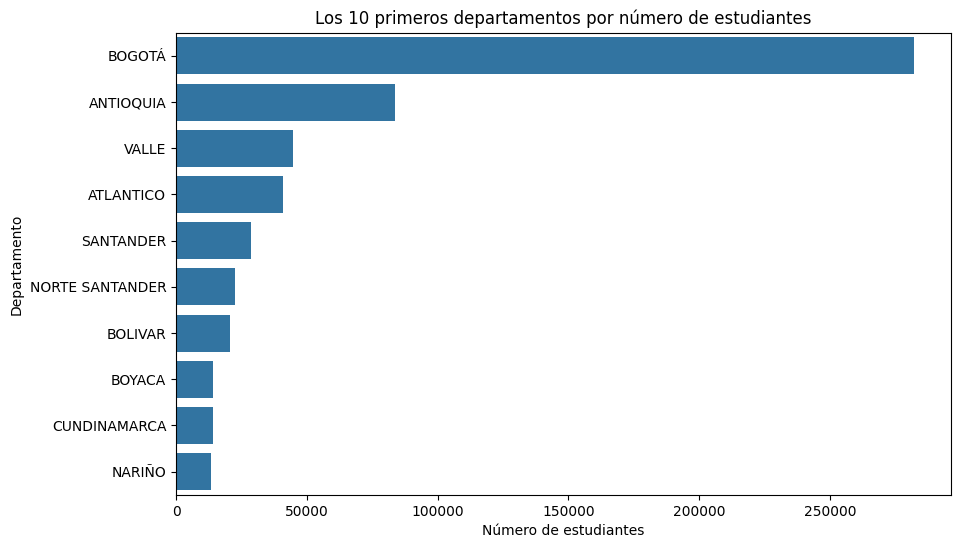

In [9]:
# Importar plot
import matplotlib.pyplot as plt

# Distribución de estudiantes por localidad (ESTU_PRGM_DEPARTAMENTO)
print("\nDistribución de los estudiantes por departamentos :")
department_counts = train_df['ESTU_PRGM_DEPARTAMENTO'].value_counts()
print(department_counts.head(10))  # Afficher les 10 départements les plus fréquents

# Distribución de los estudiantes por departamento (Top 10)
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, y='ESTU_PRGM_DEPARTAMENTO',
              order=department_counts.index[:10])
plt.title("Los 10 primeros departamentos por número de estudiantes")
plt.xlabel("Número de estudiantes")
plt.ylabel("Departamento")
plt.show()




---

# Características socioeconómicas - estrato :
Recuento y visualización por estrato.


Distribución de los estudiantes por estrato socioeconómico (FAMI_ESTRATOVIVIENDA) :
FAMI_ESTRATOVIVIENDA
Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64


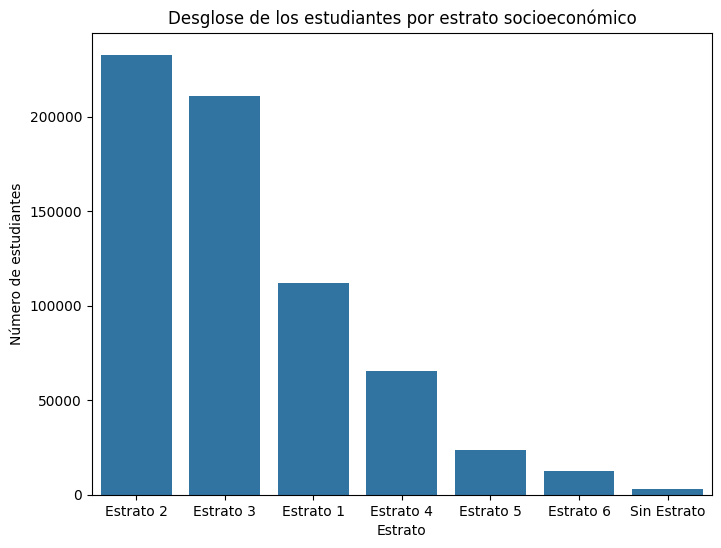

In [10]:
# Análisis de las características socioeconómicas: desglose por «FAMI_ESTRATOVIVIENDA».
print("\nDistribución de los estudiantes por estrato socioeconómico (FAMI_ESTRATOVIVIENDA) :")
strata_counts = train_df['FAMI_ESTRATOVIVIENDA'].value_counts()
print(strata_counts)

# Distribución por estrato socioeconómico
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='FAMI_ESTRATOVIVIENDA', order=strata_counts.index)
plt.title("Desglose de los estudiantes por estrato socioeconómico")
plt.xlabel("Estrato")
plt.ylabel("Número de estudiantes")
plt.show()




---
# Nivel de estudios del padre :
 Recuento y visualización por nivel de estudios del padre


Desglose de los estudiantes por nivel de estudios del padre (FAMI_EDUCACIONPADRE) :
FAMI_EDUCACIONPADRE
Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125675
Educación profesional completa           83117
Secundaria (Bachillerato) incompleta     71654
Técnica o tecnológica completa           62995
Primaria completa                        55958
Postgrado                                44169
Educación profesional incompleta         27084
Técnica o tecnológica incompleta         22552
Ninguno                                  22008
No sabe                                  16592
No Aplica                                 9229
Name: count, dtype: int64


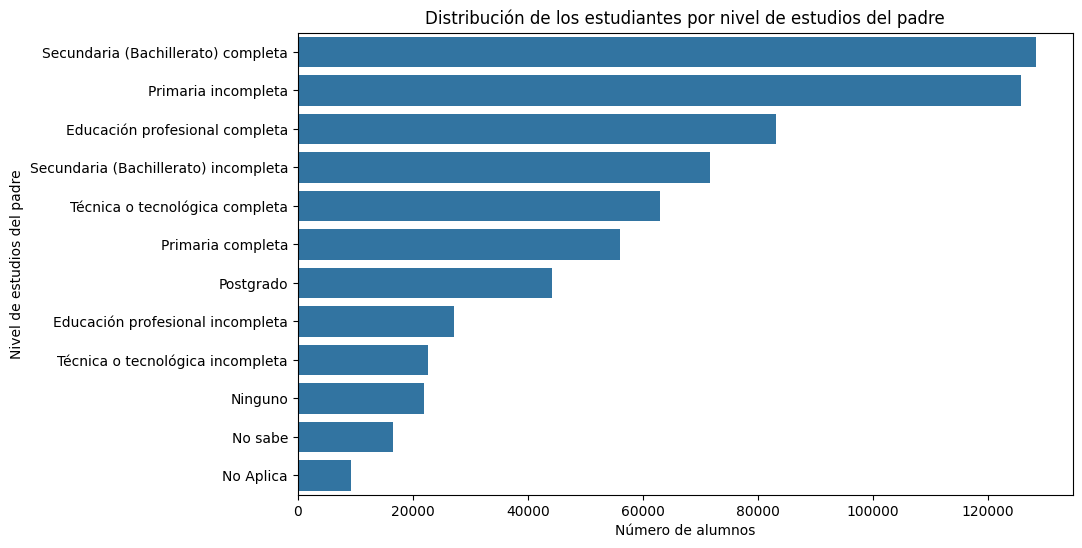

In [11]:
# Importar plot y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de la distribución de los alumnos por nivel de educación de los padres (FAMI_EDUCACIONPADRE)
print("\nDesglose de los estudiantes por nivel de estudios del padre (FAMI_EDUCACIONPADRE) :")
father_education_counts = train_df['FAMI_EDUCACIONPADRE'].value_counts()
print(father_education_counts)

# Visualización del nivel de estudios de los padres
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, y='FAMI_EDUCACIONPADRE',
              order=father_education_counts.index)
plt.title("Distribución de los estudiantes por nivel de estudios del padre")
plt.xlabel("Número de alumnos")
plt.ylabel("Nivel de estudios del padre")
plt.show()




---


# Análisis cruzado: Nivel educativo de los padres y rendimiento

Este análisis ayuda a visualizar el impacto potencial del nivel educativo de los padres en el rendimiento académico


Distribución del resultado según el nivel de estudios del padre :


RENDIMIENTO_GLOBAL,alto,bajo,medio-alto,medio-bajo
FAMI_EDUCACIONPADRE,,,,
Educación profesional completa,33397,13733,20317,15670
Educación profesional incompleta,9473,5131,6879,5601
Ninguno,2091,9714,3961,6242
No Aplica,2325,2070,2455,2379
No sabe,5060,3068,4626,3838
Postgrado,23856,4508,9732,6073
Primaria completa,8838,17647,13359,16114
Primaria incompleta,16839,42457,28937,37442
Secundaria (Bachillerato) completa,30485,30090,34345,33369


<Figure size 1200x800 with 0 Axes>

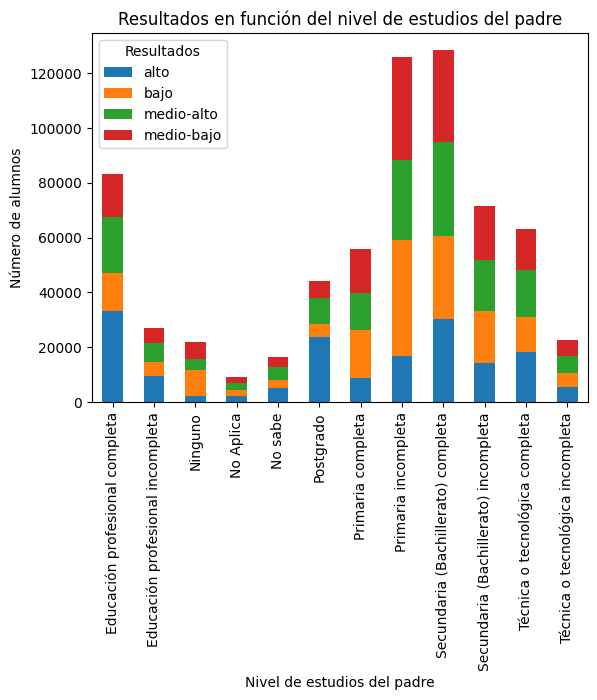


Distribución de los resultados según el nivel de estudios de la madre :


RENDIMIENTO_GLOBAL,alto,bajo,medio-alto,medio-bajo
FAMI_EDUCACIONMADRE,,,,
Educación profesional completa,35790,13210,20689,15637
Educación profesional incompleta,8232,4069,5714,4455
Ninguno,1116,7111,2210,4046
No Aplica,344,649,402,523
No sabe,761,824,728,704
Postgrado,23581,5001,10792,6872
Primaria completa,8117,18350,13244,16414
Primaria incompleta,11522,36434,21615,29849
Secundaria (Bachillerato) completa,32663,33691,37846,37544


<Figure size 1200x800 with 0 Axes>

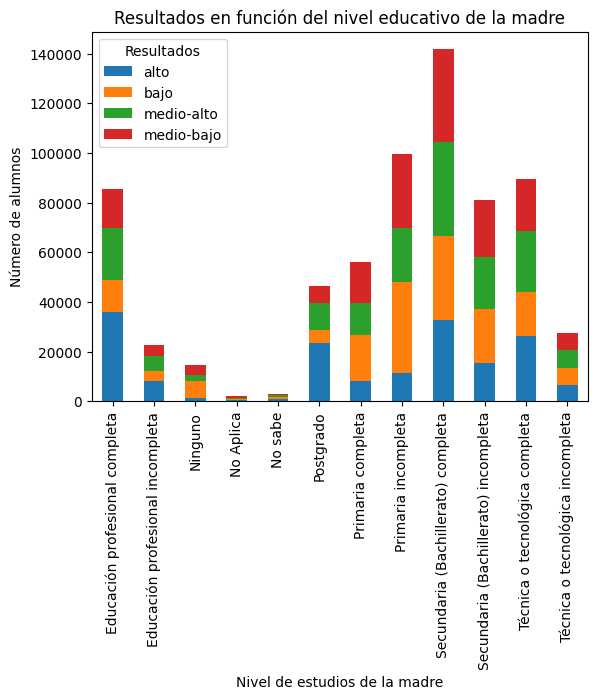

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Croisement du niveau d'éducation des pères et des mères avec la performance
father_performance = pd.crosstab(train_df['FAMI_EDUCACIONPADRE'], train_df['RENDIMIENTO_GLOBAL'])
mother_performance = pd.crosstab(train_df['FAMI_EDUCACIONMADRE'], train_df['RENDIMIENTO_GLOBAL'])

# Afficher tableau croisé père
print("\nDistribución del resultado según el nivel de estudios del padre :")
display(father_performance)

# Visualisation pour le niveau d'éducation du père
plt.figure(figsize=(12, 8))
father_performance.plot(kind='bar', stacked=True)
plt.title("Resultados en función del nivel de estudios del padre")
plt.xlabel("Nivel de estudios del padre")
plt.ylabel("Número de alumnos")
plt.legend(title="Resultados")
plt.show()

# Afficher tableau croisé mère
print("\nDistribución de los resultados según el nivel de estudios de la madre :")
display(mother_performance)

# Visualisation de la répartition des performances en fonction du niveau d'éducation de la mère
plt.figure(figsize=(12, 8))
mother_performance.plot(kind='bar', stacked=True)
plt.title("Resultados en función del nivel educativo de la madre")
plt.xlabel("Nivel de estudios de la madre")
plt.ylabel("Número de alumnos")
plt.legend(title="Resultados")
plt.show()
